___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aslik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aslik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aslik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
!pip install wordcloud
from wordcloud import WordCloud

### Data Wrangling
Take info

In [4]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
data.shape

(23486, 11)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [7]:
data['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [8]:
data['Recommended IND'].isnull().sum()

0

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Missing Value Detection

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Feature Selection and Rename Column Name

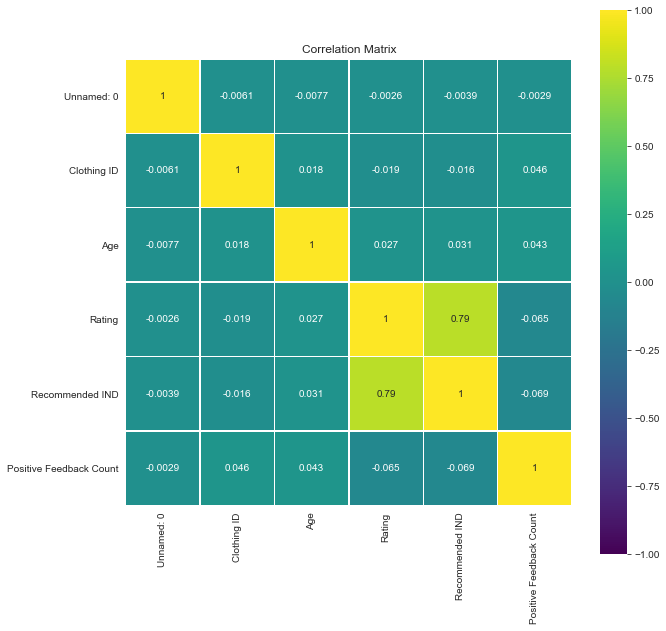

In [11]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

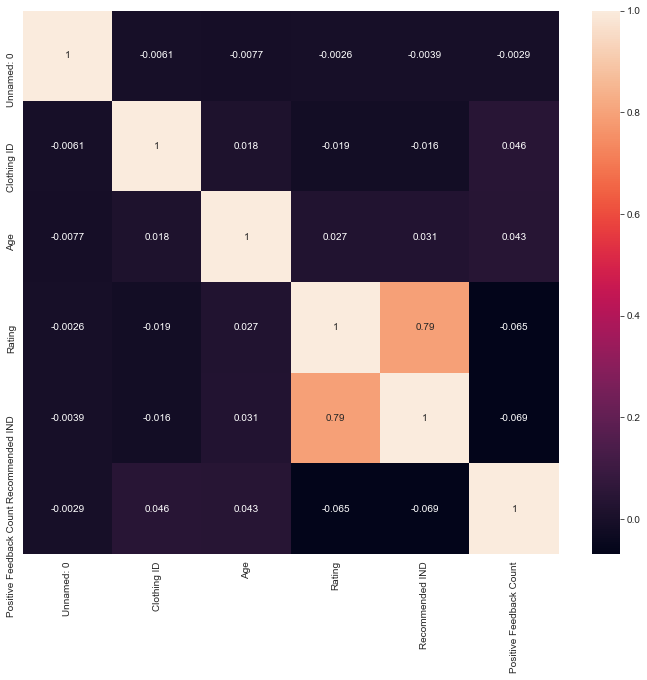

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True);

### Rating Feature

In [13]:
#1
data['Recommended IND'].corr(data.Rating)

0.7923362879285789

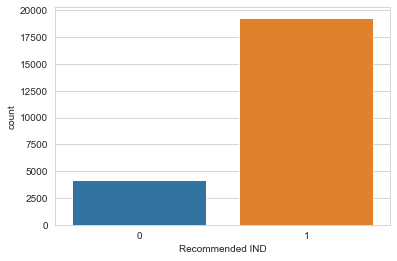

In [14]:
sns.countplot(x='Recommended IND',data=data);

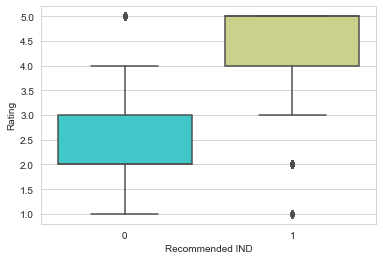

In [15]:
sns.boxplot(x='Recommended IND',y='Rating',data=data, palette='rainbow');

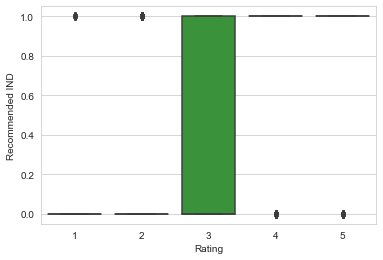

In [16]:
sns.boxplot(x='Rating',y='Recommended IND',data=data);

In [17]:
data['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [18]:
data['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [19]:
#2
data.groupby('Rating')['Recommended IND'].value_counts()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       1                   4909
        0                    168
5       1                  13106
        0                     25
Name: Recommended IND, dtype: int64

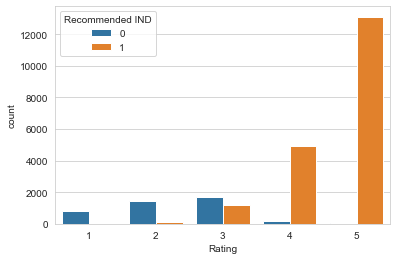

In [20]:
sns.countplot(x='Rating',data=data, hue='Recommended IND');

In [21]:
for i in data.Rating.unique():
    print(data[data.Rating==i]['Recommended IND'].value_counts()/data.Rating.value_counts()[i])

1    0.96691
0    0.03309
Name: Recommended IND, dtype: float64
1    0.998096
0    0.001904
Name: Recommended IND, dtype: float64
0    0.585859
1    0.414141
Name: Recommended IND, dtype: float64
0    0.939936
1    0.060064
Name: Recommended IND, dtype: float64
0    0.980998
1    0.019002
Name: Recommended IND, dtype: float64


In [22]:
data.groupby('Recommended IND')['Rating'].value_counts()

Recommended IND  Rating
0                3          1682
                 2          1471
                 1           826
                 4           168
                 5            25
1                5         13106
                 4          4909
                 3          1189
                 2            94
                 1            16
Name: Rating, dtype: int64

### Positive Feedback Count Feature

In [23]:
#3
data['Recommended IND'].corr(data['Positive Feedback Count'])

-0.06904528557098558

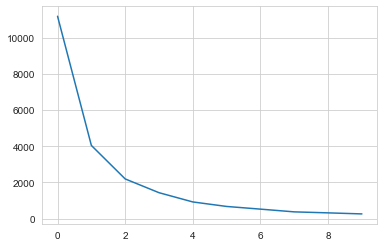

In [24]:
sns.lineplot(data=data['Positive Feedback Count'].value_counts().head(10));

In [25]:
data['Positive Feedback Count'].value_counts()

0     11176
1      4043
2      2193
3      1433
4       922
      ...  
52        1
56        1
61        1
99        1
95        1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [26]:
data.groupby('Recommended IND')['Positive Feedback Count'].mean()

Recommended IND
0    3.383030
1    2.352956
Name: Positive Feedback Count, dtype: float64

In [27]:
data.groupby('Rating')['Positive Feedback Count'].mean()

Rating
1    3.459620
2    3.325879
3    3.145246
4    2.405554
5    2.299749
Name: Positive Feedback Count, dtype: float64

In [28]:
data['Positive Feedback Count'].mean()

2.535936302478072

In [29]:
data['Rating'].corr(data['Positive Feedback Count'])

-0.06496050712064401

### Age Feature

In [30]:
#4
data.groupby('Rating')['Age'].mean()

Rating
1    43.693587
2    42.622364
3    42.158481
4    42.887532
5    43.583124
Name: Age, dtype: float64

In [31]:
data.groupby('Recommended IND')['Age'].mean()

Recommended IND
0    42.389501
1    43.373304
Name: Age, dtype: float64

In [32]:
data.Age.mean()

43.198543813335604

In [33]:
data['Recommended IND'].corr(data.Age)

0.03062205453346322

In [34]:
data['Rating'].corr(data.Age)

0.02683057465280272

In [35]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Class / Division / Depatment Name Features

In [36]:
data['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

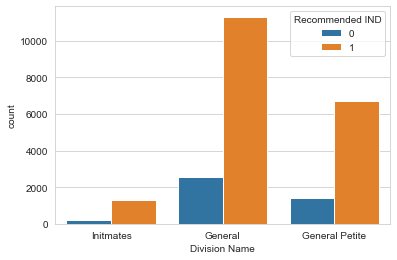

In [37]:
sns.countplot(x='Division Name',data=data, hue='Recommended IND' );

In [38]:
data['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

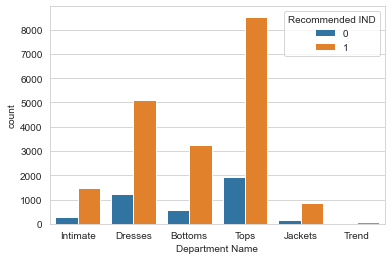

In [39]:
sns.countplot(x='Department Name',data=data, hue='Recommended IND' );

In [40]:
data['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [41]:
#5
(data['Class Name'].isnull()==data['Department Name'].isnull()).mean()

1.0

In [42]:
(data['Class Name'].isnull()==data['Division Name'].isnull()).mean()

1.0

In [43]:
data.groupby('Department Name')['Class Name'].value_counts()

Department Name  Class Name    
Bottoms          Pants             1388
                 Jeans             1147
                 Skirts             945
                 Shorts             317
                 Casual bottoms       2
Dresses          Dresses           6319
Intimate         Lounge             691
                 Swim               350
                 Sleep              228
                 Legwear            165
                 Intimates          154
                 Layering           146
                 Chemises             1
Jackets          Jackets            704
                 Outerwear          328
Tops             Knits             4843
                 Blouses           3097
                 Sweaters          1428
                 Fine gauge        1100
Trend            Trend              119
Name: Class Name, dtype: int64

In [44]:
data.groupby('Division Name')['Department Name'].value_counts()

Division Name   Department Name
General         Tops               6837
                Dresses            3730
                Bottoms            2542
                Jackets             645
                Trend                96
General Petite  Tops               3631
                Dresses            2589
                Bottoms            1257
                Jackets             387
                Intimate            233
                Trend                23
Initmates       Intimate           1502
Name: Department Name, dtype: int64

In [45]:
data.groupby('Division Name')['Recommended IND'].value_counts()

Division Name   Recommended IND
General         1                  11313
                0                   2537
General Petite  1                   6707
                0                   1413
Initmates       1                   1280
                0                    222
Name: Recommended IND, dtype: int64

In [46]:
data.groupby('Department Name')['Recommended IND'].value_counts()

Department Name  Recommended IND
Bottoms          1                  3234
                 0                   565
Dresses          1                  5107
                 0                  1212
Intimate         1                  1475
                 0                   260
Jackets          1                   863
                 0                   169
Tops             1                  8533
                 0                  1935
Trend            1                    88
                 0                    31
Name: Recommended IND, dtype: int64

In [47]:
data.groupby('Class Name')['Recommended IND'].value_counts()

Class Name      Recommended IND
Blouses         1                  2509
                0                   588
Casual bottoms  1                     2
Chemises        1                     1
Dresses         1                  5107
                0                  1212
Fine gauge      1                   921
                0                   179
Intimates       1                   132
                0                    22
Jackets         1                   595
                0                   109
Jeans           1                  1011
                0                   136
Knits           1                  3960
                0                   883
Layering        1                   129
                0                    17
Legwear         1                   142
                0                    23
Lounge          1                   594
                0                    97
Outerwear       1                   268
                0                    60
Pants   

#### To sum up, in this section I have controlled:

1- the correlation between 'Recommended IND' and 'Rating'. They are strongly and positively correlated as expected (0.792)

2- just like 1st, trend for the 'Rating' column and 'Recommended IND'. Most of the 0 Rating givers (97%) did not recommend the product, where most of the 5 Rating givers (98%) recommended the product. This is also an expected result.

3- the correlation between 'Recommended IND' and 'Positive Feedback Count'. It is almost 0 (-0.069). On the other hand mean of 'Positive Feedback Count' for recomenders is 2.35, where it is 3.38 for not-recomenders. We can seee the difference.

4- the correlation between 'Recommended IND' and 'Age'. It is also almost 0 (0.031). Mean of the Age for all Rating groups and both Recomendation groups are almost same with the mean Age of the dataset.

5- row of the the 14 missing values of Class, Department and Division columns. They are overlapped:) Additionally, here we see that Department Name is like category and Class Name is like sub-category. But there is no such relationship between 'Department Name' and 'Division Name' columns.

#### As a result
I decided to 

drop 'Unnamed: 0', 'Clothing ID', 'Age' and 'Title' columns, since they seem useless. 'Division Name', 'Department Name', 'Class Name' features also seem useless, so I dropped them too.

I keep 'Review Text' column for NLP. 

I also keep 'Rating' and 'Positive Feedback Count' to use in classification models.

In [48]:
df=data.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Division Name', 'Department Name', 'Class Name'], axis=1)

In [49]:
df.rename({"Review Text":"sentences",  "Rating":"rating", "Recommended IND":"label", "Positive Feedback Count":"feedback"}, axis=1, inplace =True)

In [50]:
df.head()

,sentences,rating,label,feedback
0,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,Love this dress! it's sooo pretty. i happene...,5,1,4
2,I had such high hopes for this dress and reall...,3,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,This shirt is very flattering to all due to th...,5,1,6


In [51]:
df_start=df.copy()

In [52]:
df_start.isnull().sum()

sentences    845
rating         0
label          0
feedback       0
dtype: int64

In [53]:
df_start.shape

(23486, 4)

In [54]:
df=df_start.dropna()

In [55]:
df.shape

(22641, 4)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization + Lexicon Normalization

In [56]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [57]:
df.head()

,sentences,rating,label,feedback
0,absolutely wonderful silky sexy comfortable,4,1,0
1,love dress sooo pretty happened find store gla...,5,1,4
2,high hope dress really wanted work initially o...,3,0,0
3,love love love jumpsuit fun flirty fabulous ev...,5,1,0
4,shirt flattering due adjustable front tie perf...,5,1,6


### Noise Removal

In [58]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-300:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


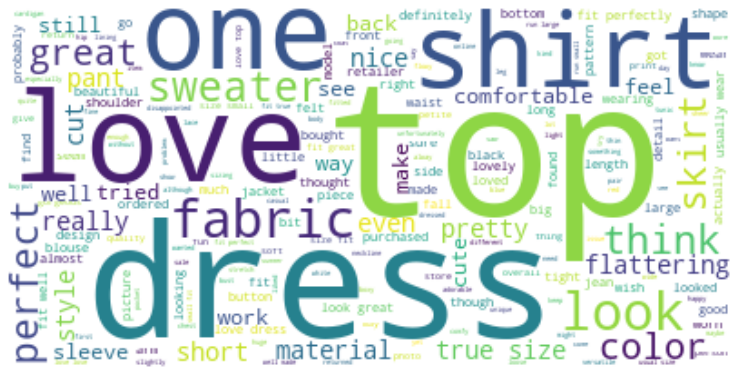

In [59]:
text=''
for i in df.sentences:
    text+=' '+i
    
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

### Detect Reviews & Collect Words (positive and negative separately)

In [60]:
text_positive=''
for i in df[df.label==1].sentences:
    text_positive +=' '+i

In [61]:
# text_positive.most_common()

In [62]:
text_negative=''
for i in df[df.label==0].sentences:
    text_negative +=' '+i

In [63]:
# text_negative.most_common(10)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

Positive Wordcloud


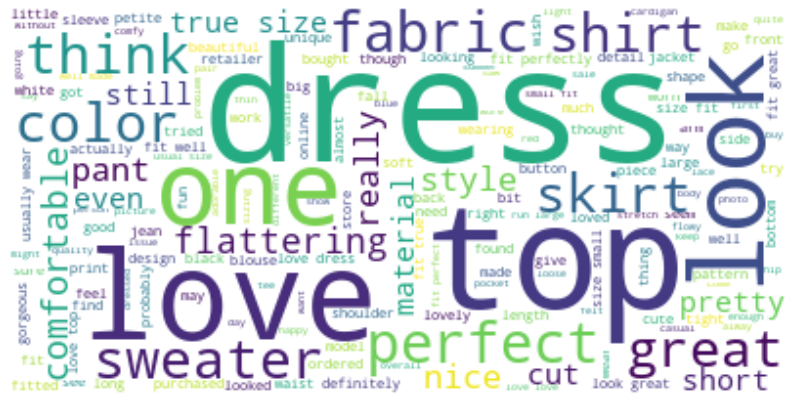

In [64]:
print('Positive Wordcloud')
wordcloud = WordCloud(background_color="white").generate(text_positive)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

Negative Wordcloud


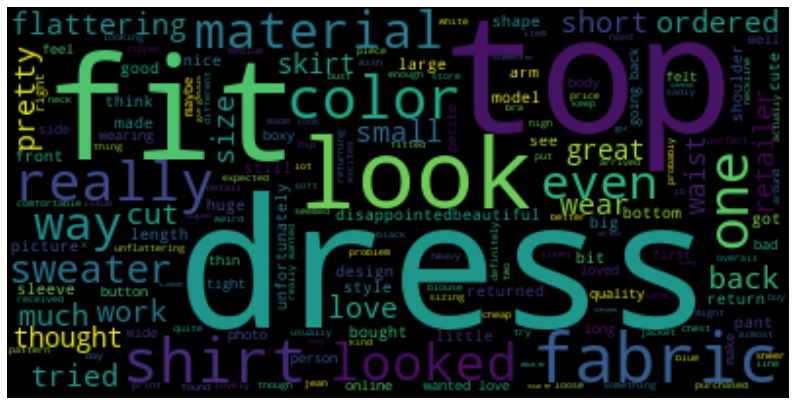

In [65]:
print('Negative Wordcloud')
wordcloud = WordCloud().generate(text_negative)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df['sentences']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=33)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [68]:
vectorizer=CountVectorizer().fit(X_train)

In [69]:
X_train_count=vectorizer.transform(X_train)
X_test_count= vectorizer.transform(X_test)

In [70]:
vectorizer.get_feature_names()[:5]

['aa', 'aaaaannnnnnd', 'aaaahmazing', 'aaahed', 'aame']

In [71]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF

In [72]:
tf_idf_word_vec=TfidfVectorizer().fit(X_train)

X_train_tfidf=tf_idf_word_vec.transform(X_train)
X_test_tfidf=tf_idf_word_vec.transform(X_test)

tf_idf_word_vec.get_feature_names()[:5]

['aa', 'aaaaannnnnnd', 'aaaahmazing', 'aaahed', 'aame']

In [73]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Logistic Regression

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
log_classifier = linear_model.LogisticRegression().fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 742  494]
 [ 309 5248]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1236
           1       0.91      0.94      0.93      5557

    accuracy                           0.88      6793
   macro avg       0.81      0.77      0.79      6793
weighted avg       0.88      0.88      0.88      6793



In [75]:
log_classifier = linear_model.LogisticRegression().fit(X_train_count, y_train)
# Make predictions
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                                     X_test_count,
                                                     y_test,
                                                     cv=10).mean()
print('Count Vector Accuracy:', log_accuracy_count)

Count Vector Accuracy: 0.872513644633111


In [76]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8678032140691329


### XGBoost

In [77]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 625  611]
 [ 210 5347]]
              precision    recall  f1-score   support

           0       0.75      0.51      0.60      1236
           1       0.90      0.96      0.93      5557

    accuracy                           0.88      6793
   macro avg       0.82      0.73      0.77      6793
weighted avg       0.87      0.88      0.87      6793



#### Tuning XGBoost

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [79]:
xgb_params = {"n_estimators": [300, 500, 1000],
             "subsample":[1,0.7],
             "max_depth":[3,10, 20],
             "learning_rate":[0.1, 0.3, 0.01]}

In [80]:
xgb = XGBClassifier()
xgb_classifier_tuned = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train_count , y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  7.0min finished


In [81]:
xgb_classifier_tuned.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.7}

In [82]:
xgb_tuned = XGBClassifier(learning_rate =0.1, max_depth=10, n_estimators=500, subsample=0.7).fit(X_train_count, y_train)

# Make predictions
y_pred = xgb_tuned.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 678  558]
 [ 245 5312]]
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      1236
           1       0.90      0.96      0.93      5557

    accuracy                           0.88      6793
   macro avg       0.82      0.75      0.78      6793
weighted avg       0.87      0.88      0.87      6793



In [83]:
xgb_classifier = XGBClassifier().fit(X_train_count , y_train)

xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

xgb_classifier = XGBClassifier().fit(X_train_tfidf , y_train)

xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

Count Vectors Accuracy: 0.8695685696959197
TF-IDF Accuracy: 0.8627995321840076


In [84]:
xgb_tuned = XGBClassifier(learning_rate =0.1, max_depth=10, n_estimators=500, subsample=0.7).fit(X_train_count, y_train)

xgb_tuned_accuracy_count = model_selection.cross_val_score(xgb_tuned,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_tuned_accuracy_count)


xgb_tuned = XGBClassifier(learning_rate =0.1, max_depth=10, n_estimators=500, subsample=0.7).fit(X_train_tfidf , y_train)

xgb_tuned_accuracy_tf = model_selection.cross_val_score(xgb_tuned, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_tuned_accuracy_tf)

Count Vectors Accuracy: 0.8703042969765227
TF-IDF Accuracy: 0.8701574547344713


### Naive Bayes 



#### Multinomial Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
mnb= MultinomialNB().fit(X_train_count , y_train)

mnb_accuracy_count = model_selection.cross_val_score(mnb,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", mnb_accuracy_count)

mnb= MultinomialNB().fit(X_train_tfidf , y_train)

mnb_accuracy_tf = model_selection.cross_val_score(mnb, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", mnb_accuracy_tf)

Count Vectors Accuracy: 0.8734001126223687
TF-IDF Accuracy: 0.8184897773542407


#### Bernoulli Naive Bayes

In [87]:
from sklearn.naive_bayes import BernoulliNB

In [88]:
bnb= BernoulliNB().fit(X_train_count , y_train)

bnb_accuracy_count = model_selection.cross_val_score(bnb,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", bnb_accuracy_count)

bnb= BernoulliNB().fit(X_train_tfidf , y_train)

bnb_accuracy_tf = model_selection.cross_val_score(bnb, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", bnb_accuracy_tf)

Count Vectors Accuracy: 0.8541172138958677
TF-IDF Accuracy: 0.8541172138958677


#### Complement Naive Bayes

In [89]:
from sklearn.naive_bayes import ComplementNB

In [90]:
cnb= ComplementNB().fit(X_train_count , y_train)

cnb_accuracy_count = model_selection.cross_val_score(cnb,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", cnb_accuracy_count)

cnb= ComplementNB().fit(X_train_tfidf , y_train)

cnb_accuracy_tf = model_selection.cross_val_score(cnb, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", cnb_accuracy_tf)

Count Vectors Accuracy: 0.8789928961275232
TF-IDF Accuracy: 0.8373343151693666


##### Comparison of Naive Bayes Algorithms

Comparison of Naive Bayes Algorithms


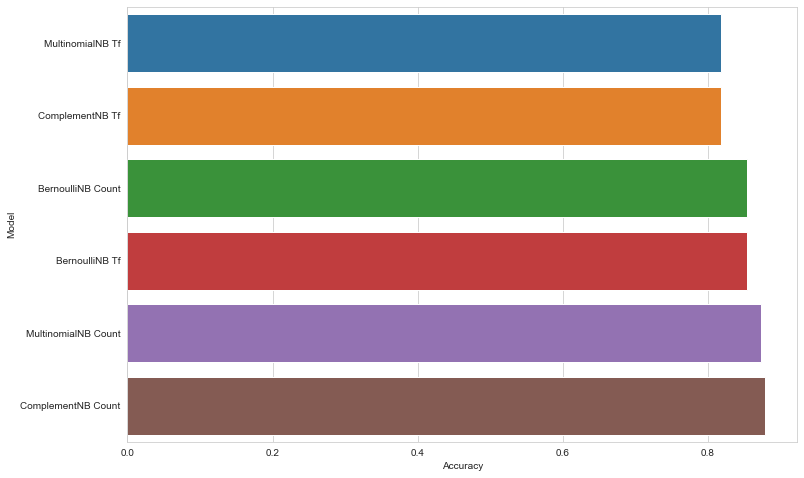

In [91]:
print('Comparison of Naive Bayes Algorithms')
compare = pd.DataFrame({"Model": ["MultinomialNB Count", "MultinomialNB Tf", "BernoulliNB Count", "BernoulliNB Tf", "ComplementNB Count", 
                                  "ComplementNB Tf"],
                        "Accuracy": [mnb_accuracy_count, mnb_accuracy_tf, bnb_accuracy_count, bnb_accuracy_tf, cnb_accuracy_count, 
                                     mnb_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)

Above chart shows us that we receive the highest score with Complement Naive Bayes. So I will choose Complement Naive Bayes among all other Naive Bayes models.

### Support Vector Machine (SVM)

In [92]:
from sklearn.svm import SVC
svc = SVC().fit(X_train_count, y_train)
# Make predictions
y_pred = svc.predict(X_test_count)
print(confusion_matrix(y_test, y_pred), '\n', '\n')
print(classification_report(y_test, y_pred))

[[ 609  627]
 [ 185 5372]] 
 

              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1236
           1       0.90      0.97      0.93      5557

    accuracy                           0.88      6793
   macro avg       0.83      0.73      0.76      6793
weighted avg       0.87      0.88      0.87      6793



In [93]:
svc = SVC().fit(X_train_count, y_train)
svc_accuracy_count = model_selection.cross_val_score(svc,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", svc_accuracy_count)

svc = SVC().fit(X_train_tfidf , y_train)

svc_accuracy_tf = model_selection.cross_val_score(svc, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", svc_accuracy_tf)

Count Vectors Accuracy: 0.8683918825262065
TF-IDF Accuracy: 0.8710413237459933


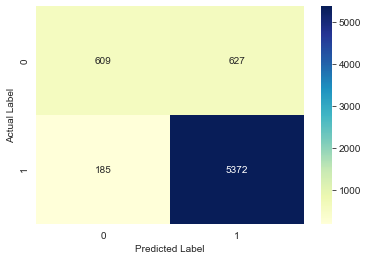

In [94]:
sns.heatmap( confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

#### GridSearch

In [95]:
#from sklearn.model_selection import GridSearchCV

In [96]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
#
#grid = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs = -1, refit=True)
#grid.fit(X_train_count,y_train)

In [97]:
#print(grid.best_params_)
#print(grid.best_estimator_)

In [98]:
## Make predictions
#grid_accuracy_count = model_selection.cross_val_score(grid,
#                                                     X_test_count,
#                                                     y_test,
#                                                     cv=10).mean()
#print('Count Vector Accuracy:', grid_accuracy_count)

In [99]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
#
#grid_tfidf = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs = -1, refit=True)
#grid.fit(X_train_tfidf,y_train)

In [100]:
#grid_accuracy_tf = model_selection.cross_val_score(grid_tfidf,
#                                           X_test_tfidf,
#                                           y_test,
#                                           cv = 10).mean()
#print("TF-IDF Accuracy:", grid_accuracy_tf)

In [101]:
#print('Count Vector Accuracy:', grid_accuracy_count)
#print("TF-IDF Accuracy:", grid_accuracy_tf)

### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model=RandomForestClassifier().fit(X_train_count, y_train)
# Make predictions
y_pred = rf_model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred), '\n', '\n')
print(classification_report(y_test, y_pred))

[[ 304  932]
 [  70 5487]] 
 

              precision    recall  f1-score   support

           0       0.81      0.25      0.38      1236
           1       0.85      0.99      0.92      5557

    accuracy                           0.85      6793
   macro avg       0.83      0.62      0.65      6793
weighted avg       0.85      0.85      0.82      6793



In [104]:
rf=RandomForestClassifier()

rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train_count, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.2min finished


{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [105]:
# Tuned RF scores
rf_tuned = RandomForestClassifier(max_depth = 3,             
                                  max_features = 2, 
                                  min_samples_split = 2, 
                                  n_estimators = 50).fit(X_train_count, y_train)

rf_tuned_accuracy_count = model_selection.cross_val_score(rf_tuned,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_tuned_accuracy_count)

rf_tuned=RandomForestClassifier(max_depth = 3,             
                                  max_features = 2, 
                                  min_samples_split = 2, 
                                  n_estimators = 50).fit(X_train_tfidf , y_train)

rf_tuned_accuracy_tf = model_selection.cross_val_score(rf_tuned, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", rf_tuned_accuracy_tf)

Count Vectors Accuracy: 0.8180481677206964
TF-IDF Accuracy: 0.8180481677206964


In [106]:
# RF Scores without tuning
rf_model=RandomForestClassifier().fit(X_train_count, y_train)

rf_accuracy_count = model_selection.cross_val_score(rf_model,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy_count)

rf_model=RandomForestClassifier().fit(X_train_tfidf , y_train)

rf_accuracy_tf = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", rf_accuracy_tf)

Count Vectors Accuracy: 0.8464610586502642
TF-IDF Accuracy: 0.8627995321840076


### Ada  Boosting

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
adaboost=AdaBoostClassifier().fit(X_train_count, y_train)
ada_accuracy_count = model_selection.cross_val_score(adaboost,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Ada Boost Accuracy:", ada_accuracy_count)

adaboost=AdaBoostClassifier().fit(X_train_tfidf , y_train)
ada_accuracy_tf = model_selection.cross_val_score(adaboost, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()
print("TF-IDF Accuracy:", ada_accuracy_tf)

Ada Boost Accuracy: 0.8494026682838083
TF-IDF Accuracy: 0.8554387940743308


### Compare Models Accuracies and F1 Scores

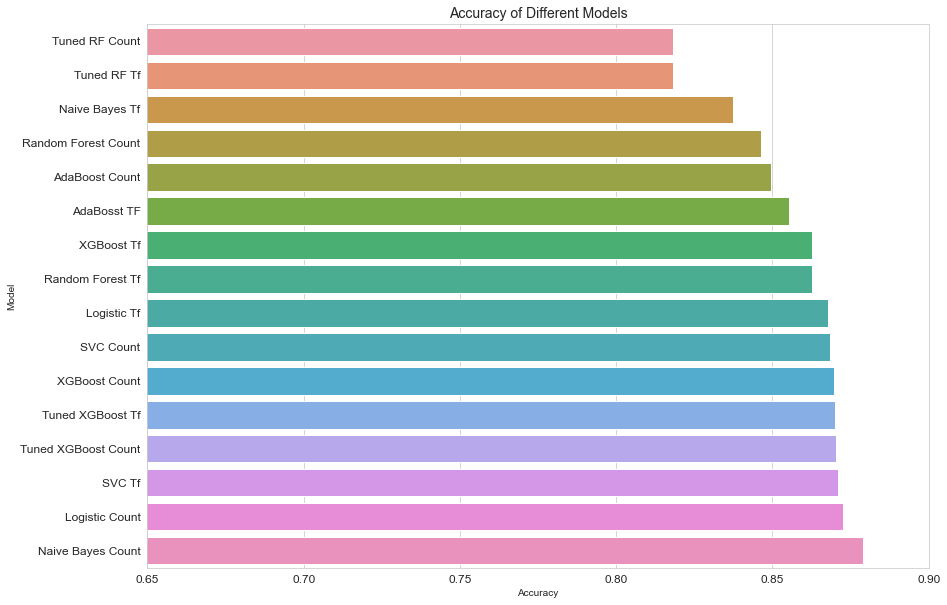

In [109]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Tuned XGBoost Count", 
                                  "Tuned XGBoost Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVC Count", "SVC Tf", "Random Forest Count",
                                  "Random Forest Tf", "Tuned RF Count","Tuned RF Tf", "AdaBoost Count", "AdaBosst TF" ],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, xgb_tuned_accuracy_count, 
                                     xgb_tuned_accuracy_tf, cnb_accuracy_count, cnb_accuracy_tf, svc_accuracy_count, svc_accuracy_tf, 
                                     rf_accuracy_count, rf_accuracy_tf, rf_tuned_accuracy_count, rf_tuned_accuracy_tf, ada_accuracy_count, 
                                     ada_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(14,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
ax.set_xlim(.65, .90)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy of Different Models", size=14);

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

## Working on Numeric Features

In [110]:
# Now let's try a different approach. I will use 'rating' and 'feedback' columns to predict 'label' column.

In [111]:
df_start.head()

,sentences,rating,label,feedback
0,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,Love this dress! it's sooo pretty. i happene...,5,1,4
2,I had such high hopes for this dress and reall...,3,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,This shirt is very flattering to all due to th...,5,1,6


## 1.KNeighborsClassifer

In [112]:
X = df[['rating', 'feedback']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=33)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [114]:
print(confusion_matrix(y_test,pred_knn), '\n', '\n')
print(classification_report(y_test,pred_knn))

[[1085  151]
 [ 315 5242]] 
 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1236
           1       0.97      0.94      0.96      5557

    accuracy                           0.93      6793
   macro avg       0.87      0.91      0.89      6793
weighted avg       0.94      0.93      0.93      6793



In [115]:
error_rate = []

# Will take some time
for i in range(2,20,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

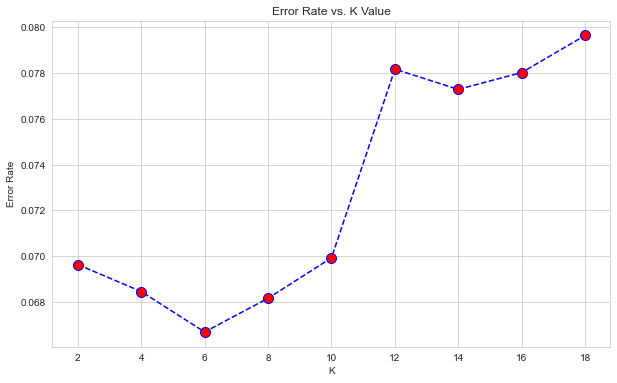

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [117]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

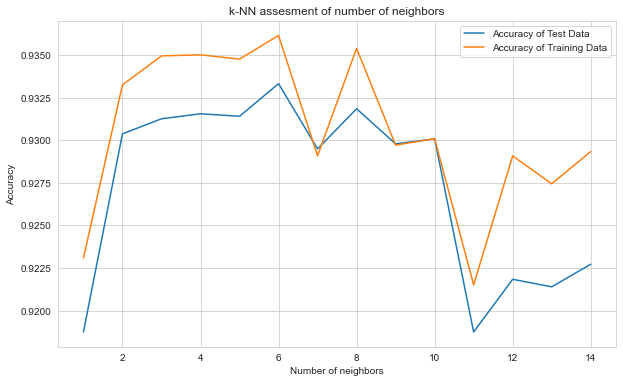

In [118]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [119]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn), '\n', '\n')
print(classification_report(y_test,pred_knn))

[[1144   92]
 [ 361 5196]] 
 

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1236
           1       0.98      0.94      0.96      5557

    accuracy                           0.93      6793
   macro avg       0.87      0.93      0.90      6793
weighted avg       0.94      0.93      0.94      6793



In [120]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, pred_knn, average='macro')
knn_accuracy = knn.score(X_test,y_test)
print('knn_f1:', knn_f1)
print('knn_accuracy:', knn_accuracy)

knn_f1: 0.8964807242916968
knn_accuracy: 0.933313705284852


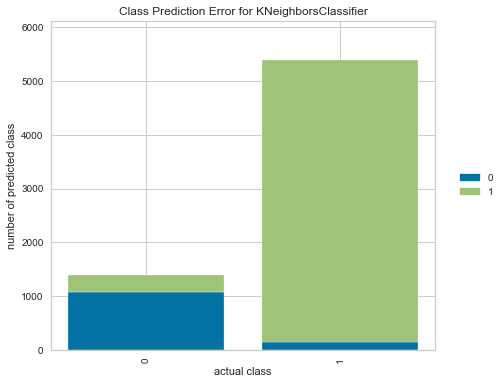

In [121]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(KNeighborsClassifier())
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show();

## 2. Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(X_train,y_train)

pred_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,pred_tree), '\n', '\n')
print(classification_report(y_test,pred_tree))

[[1147   89]
 [ 365 5192]] 
 

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1236
           1       0.98      0.93      0.96      5557

    accuracy                           0.93      6793
   macro avg       0.87      0.93      0.90      6793
weighted avg       0.94      0.93      0.94      6793



In [123]:
tree_f1 = f1_score(y_test, pred_tree, average='macro')
tree_accuracy = dtree.score(X_test,y_test)
print('tree_f1:', tree_f1)
print('tree_accuracy:', tree_accuracy)

tree_f1: 0.8964496449362895
tree_accuracy: 0.9331664949212425


## 3. Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[1146   90]
 [ 365 5192]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1236
           1       0.98      0.93      0.96      5557

    accuracy                           0.93      6793
   macro avg       0.87      0.93      0.90      6793
weighted avg       0.94      0.93      0.94      6793



In [125]:
rf_f1 = f1_score(y_test, pred_rf, average='macro')
rf_accuracy = rf_model.score(X_test,y_test)
print('rf_f1:', tree_f1)
print('rf_accuracy:', tree_accuracy)

rf_f1: 0.8964496449362895
rf_accuracy: 0.9331664949212425


## 4. XGBoost Classifier

In [126]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
pred_xg = xgb_model.predict(X_test)

print(confusion_matrix(y_test, pred_xg))
print(classification_report(y_test, pred_xg))

[[1153   83]
 [ 369 5188]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1236
           1       0.98      0.93      0.96      5557

    accuracy                           0.93      6793
   macro avg       0.87      0.93      0.90      6793
weighted avg       0.94      0.93      0.94      6793



In [127]:
from sklearn.metrics import accuracy_score
xgb_accuracy = accuracy_score(y_test, pred_xg)
xgb_f1 = f1_score(y_test, pred_xg, average='macro')
print('xgb_f1:', xgb_f1)
print('xgb_accuracy:', xgb_accuracy)

xgb_f1: 0.897184748910581
xgb_accuracy: 0.9334609156484617


## Accuracy Comparison of Classification Models

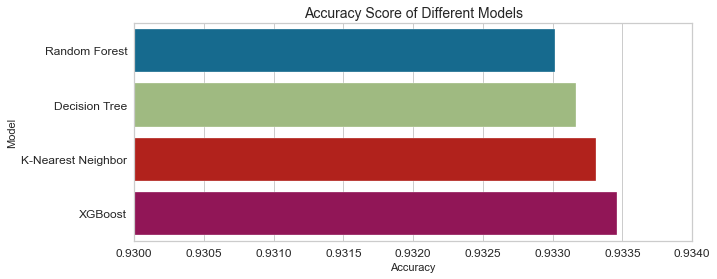

In [128]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Decision Tree", "Random Forest", "XGBoost"],
                        "Accuracy": [knn_accuracy, tree_accuracy, rf_accuracy, xgb_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
ax.set_xlim(.93, .934)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy Score of Different Models", size=14);

## F1_score Comparison of Classification Models

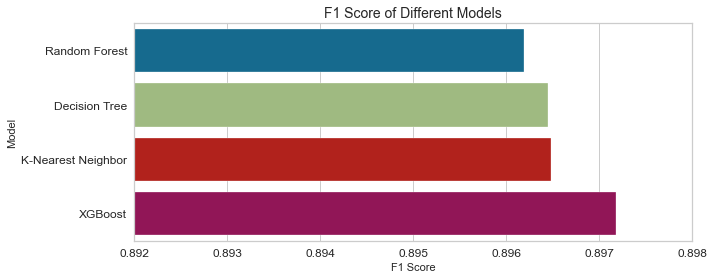

In [129]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [knn_f1, rf_f1, xgb_f1, tree_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,4))
ax = sns.barplot(x="F1 Score", y="Model", data=compare)
ax.set_xlim(.892, .898)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("F1 Score of Different Models", size=14);

The f1-scores are really close, they are all above 0.896. XGBoost seems to have the highest f1-score, 0.8972, so I will select it as the best model for this dataset.

## SMOTE Balancing

In [130]:
!pip install imblearn

In [131]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [132]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [133]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [134]:
X=data.drop(['Unnamed: 0', 'Clothing ID', 'Title', 'Review Text', 'Division Name', 'Recommended IND', 'Department Name', 'Class Name'], axis=1)
y=data['Recommended IND']

# Increasing number of Recommended IND 0 equal to Recommended IND 1
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({1: 19314, 0: 19314})


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=33)

In [136]:
# Increasing number of Recommended IND 0 equal to Recommended IND 1
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({1: 19314, 0: 19314})


### 1. KNN with SMOTE

[[5658  175]
 [ 418 5338]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5833
           1       0.97      0.93      0.95      5756

    accuracy                           0.95     11589
   macro avg       0.95      0.95      0.95     11589
weighted avg       0.95      0.95      0.95     11589



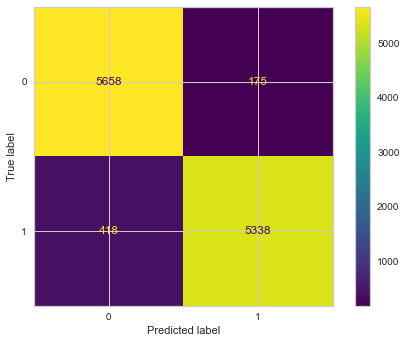

In [137]:
from sklearn.metrics import plot_confusion_matrix
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred_SMOTE = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
plot_confusion_matrix(knn_model,X_test,y_test);

In [138]:
y_pred_SMOTE = knn_model.predict(X_test)
knn_f1_SMOTE = f1_score(y_test, y_pred_SMOTE, average='macro')
knn_accuracy_SMOTE = knn_model.score(X_test,y_test)
print('knn_f1_SMOTE:', knn_f1_SMOTE)
print('knn_accuracy_SMOTE:', knn_accuracy_SMOTE)

knn_f1_SMOTE: 0.9487917443816126
knn_accuracy_SMOTE: 0.9488307878160325


### 2. Random Forest with SMOTE

[[5666  167]
 [ 363 5393]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5833
           1       0.97      0.94      0.95      5756

    accuracy                           0.95     11589
   macro avg       0.95      0.95      0.95     11589
weighted avg       0.95      0.95      0.95     11589
 
 

rf_f1_SMOTE: 0.9542415848714798
rf_accuracy_SMOTE: 0.9542669773060661


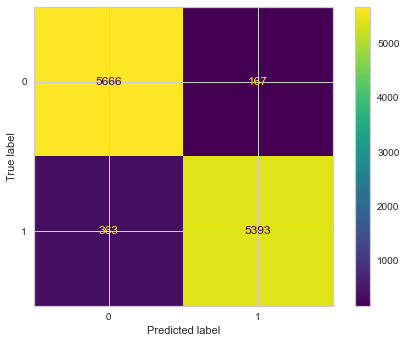

In [139]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
pred_rf_SMOTE = rf_model.predict(X_test)

print(confusion_matrix(y_test, pred_rf_SMOTE))
print(classification_report(y_test, pred_rf_SMOTE), '\n', '\n')

rf_f1_SMOTE = f1_score(y_test, pred_rf_SMOTE, average='macro')
rf_accuracy_SMOTE = rf_model.score(X_test,y_test)
print('rf_f1_SMOTE:', rf_f1_SMOTE)
print('rf_accuracy_SMOTE:', rf_accuracy_SMOTE)
plot_confusion_matrix(rf_model,X_test,y_test);

### 3. XGBOOST with SMOTE

In [141]:
xgb_model = XGBClassifier().fit(X_train, y_train)
pred_xg_SMOTE = xgb_model.predict(X_test)

print(confusion_matrix(y_test, pred_xg_SMOTE))
print(classification_report(y_test, pred_xg_SMOTE), '\n', '\n')

xgb_accuracy_SMOTE = accuracy_score(y_test, pred_xg_SMOTE)
xgb_f1_SMOTE = f1_score(y_test, pred_xg_SMOTE, average='macro')
print('xgb_f1_SMOTE:', xgb_f1_SMOTE)
print('xgb_accuracy_SMOTE:', xgb_accuracy_SMOTE)

[[5688  145]
 [ 366 5390]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5833
           1       0.97      0.94      0.95      5756

    accuracy                           0.96     11589
   macro avg       0.96      0.96      0.96     11589
weighted avg       0.96      0.96      0.96     11589
 
 

xgb_f1_SMOTE: 0.9558772885673633
xgb_accuracy_SMOTE: 0.9559064630252826


### Comparison of Accuracy and F1 Scores:

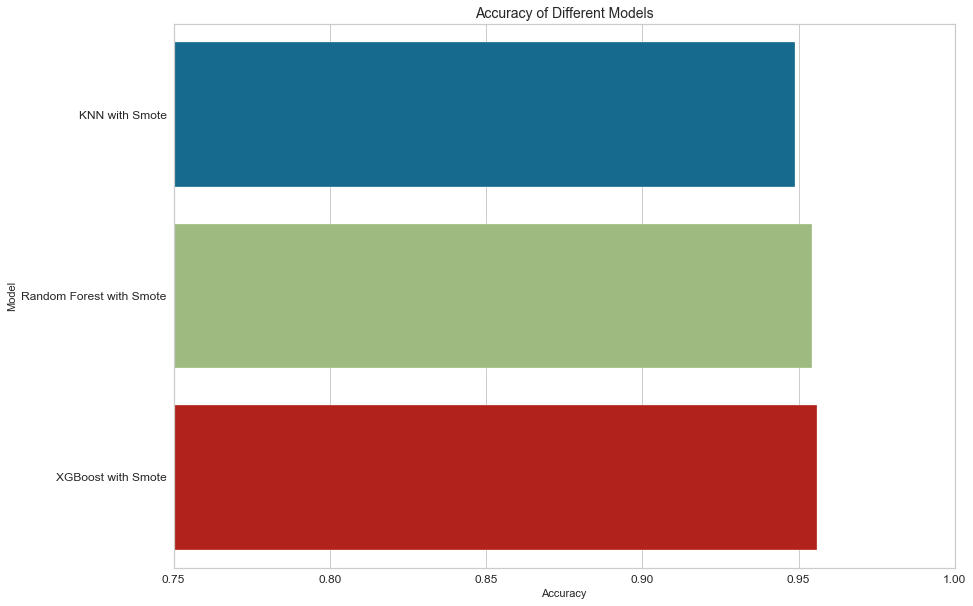

In [147]:
compare = pd.DataFrame({"Model": ["KNN with Smote", "Random Forest with Smote","XGBoost with Smote"],
                        "Accuracy": [knn_accuracy_SMOTE, rf_accuracy_SMOTE, xgb_accuracy_SMOTE]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(14,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
ax.set_xlim(.75, 1)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("Accuracy of Different Models", size=14);

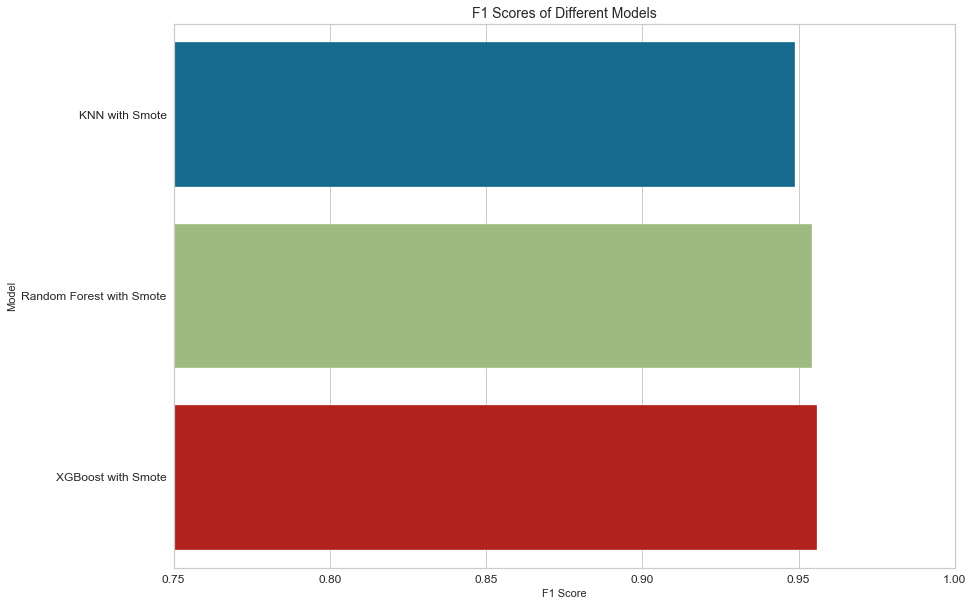

In [150]:
compare = pd.DataFrame({"Model": ["KNN with Smote", "Random Forest with Smote","XGBoost with Smote"],
                        "F1 Score": [knn_f1_SMOTE, rf_f1_SMOTE, xgb_f1_SMOTE]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(14,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare)
ax.set_xlim(.75, 1)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title("F1 Scores of Different Models", size=14);

#### Finally we reached the ent of the project:)
#### XGBoost with Smote resulted in highest scores in both F1 (0.95590) and Accuracy (0.95588).

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___